<a href="https://colab.research.google.com/github/vivsarraf/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [52]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' 'STATUS', 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(columns = ['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'])
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [53]:

# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [54]:

# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [55]:
# Drop the non-beneficial ID columns, 'ASK_AMT	'.
application_df = application_df.drop(columns = ['ASK_AMT'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,0
34297,T5,Independent,C3000,ProductDev,Association,0,1


In [56]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [57]:

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other_app_type")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3                27037
T4                 1542
T6                 1216
T5                 1173
T19                1065
T8                  737
T7                  725
T10                 528
Other_app_type      276
Name: count, dtype: int64

In [58]:

# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [59]:

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types.iloc[5:].index)
cutoff_value_classifications = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_classification")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000                   17326
C2000                    6074
C1200                    4837
Other_classification     2261
C3000                    1918
C2100                    1883
Name: count, dtype: int64

In [60]:

#convert the categorical data in numeric using get_dummies()
dummies = pd.get_dummies(application_df)
dummies.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other_app_type,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [61]:

# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# (FIRST ATTEMPT - ACCURACY 73.32%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [64]:

# Compile the model (FIRST ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:

# Train the model (FIRST ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6244 - loss: 0.6611
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7237 - loss: 0.5635
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7306 - loss: 0.5540
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7271 - loss: 0.5580
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7257 - loss: 0.5561
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7253 - loss: 0.5556
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7248 - loss: 0.5547
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7247 - loss: 0.5581
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7307 - loss: 0.5509
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7291 - loss: 0.5526
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7253 - loss: 0.5550
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [66]:
# Evaluate the model using the test data (FIRST ATTEMPT)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7332 - loss: 0.5508
Loss: 0.5507864952087402, Accuracy: 0.7331778407096863


<Axes: >

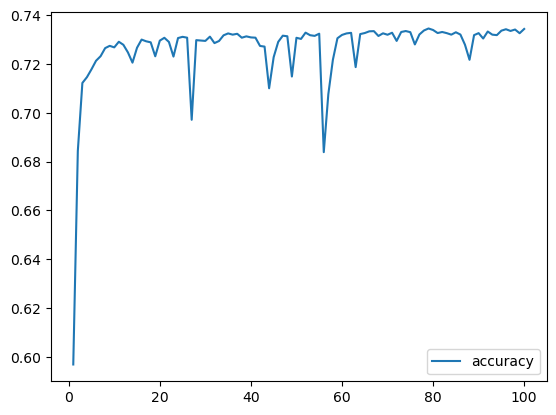

In [76]:
  # plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [67]:
# (SECOND ATTEMPT - ACCURACY 73.40%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:

# Compile the model (SECOND ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:

# Train the model (SECOND ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6701 - loss: 0.6519
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7255 - loss: 0.5655
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7258 - loss: 0.5599
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7249 - loss: 0.5576
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7288 - loss: 0.5546
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7300 - loss: 0.5524
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.5488
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7334 - loss: 0.5518
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7293 - loss: 0.5508
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7286 - loss: 0.5534
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7234 - loss: 0.5560
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [70]:

# Evaluate the model using the test data (SECOND ATTEMPT)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7340 - loss: 0.5494
Loss: 0.5494486689567566, Accuracy: 0.73399418592453


<Axes: >

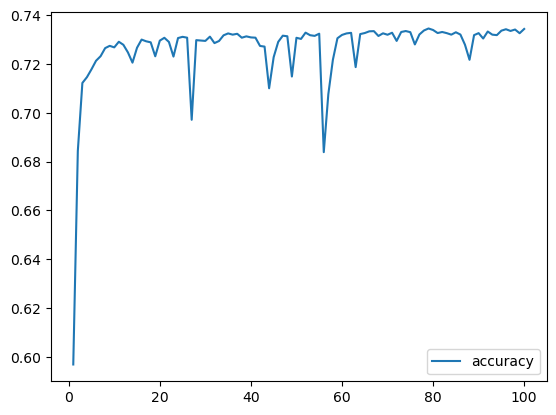

In [77]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:
# (THIRD ATTEMPT - ACCURACY 73.31%)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

In [72]:

# Compile the model (THIRD ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Train the model (THIRD ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5942 - loss: 2.6349
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6544 - loss: 0.6363
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7124 - loss: 0.5988
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7104 - loss: 0.5878
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7135 - loss: 0.5816
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7221 - loss: 0.5681
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7220 - loss: 0.5665
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7208 - loss: 0.5677
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7311 - loss: 0.5621
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7275 - loss: 0.5595
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7275 - loss: 0.5579
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [74]:

# Evaluate the model using the test data (THIRD ATTEMPT)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7331 - loss: 0.5569
Loss: 0.5568830966949463, Accuracy: 0.7330612540245056


<Axes: >

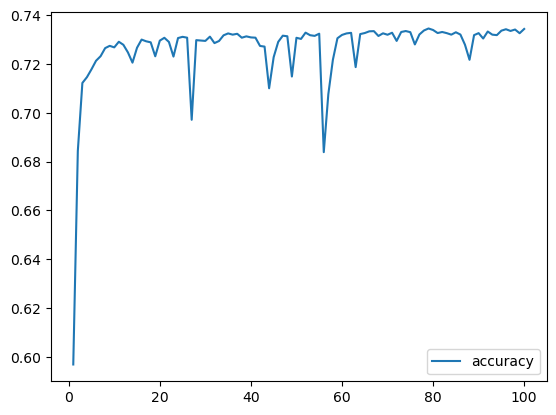

In [78]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:

# Export our model to HDF5 file
filepath = r"C:\Users\sarra\OneDrive\Desktop\deep-learning-challenge\AlphabetSoupCharity_Optimization.h5"
nn.save(filepath, save_format='h5')
